In [1]:
!pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import numpy as np

TWEET_DATA = pd.read_csv("AniesData.csv")

TWEET_DATA.head()

,Datetime,Tweet ID,Text,Username,Label
0,2022-12-13 23:34:02+00:00,1602809099346796544,@republikaonline Love pa Anies my dream presiden,BenyFitri,1
1,2022-12-13 14:50:01+00:00,1602677225660502022,Anies tukang tipu tdk bakalan jadi Presiden. B...,Omkaroll1,1
2,2022-12-13 14:48:21+00:00,1602676806016176128,Anies tukang tipu tdk bakalan jadi Presiden. B...,Omkaroll1,1
3,2022-12-13 12:13:35+00:00,1602637858245861376,@budiwidagdo2 @BosPurwa Wajahnya pada melas se...,Suprapt20545142,1
4,2022-12-13 08:00:54+00:00,1602574268826800128,"Iyq bener banget, setelah dr jakarta, sekarang...",Aryabinya2F,1


In [3]:
TWEET_DATA['Text'] = TWEET_DATA['Text'].str.lower()


print('Case Folding Result : \n')
print(TWEET_DATA.head(5))
print('\n\n\n')


Case Folding Result : 

                    Datetime             Tweet ID  \
0  2022-12-13 23:34:02+00:00  1602809099346796544   
1  2022-12-13 14:50:01+00:00  1602677225660502022   
2  2022-12-13 14:48:21+00:00  1602676806016176128   
3  2022-12-13 12:13:35+00:00  1602637858245861376   
4  2022-12-13 08:00:54+00:00  1602574268826800128   

                                                Text         Username  Label  
0   @republikaonline love pa anies my dream presiden        BenyFitri      1  
1  anies tukang tipu tdk bakalan jadi presiden. b...        Omkaroll1      1  
2  anies tukang tipu tdk bakalan jadi presiden. b...        Omkaroll1      1  
3  @budiwidagdo2 @bospurwa wajahnya pada melas se...  Suprapt20545142      1  
4  iyq bener banget, setelah dr jakarta, sekarang...      Aryabinya2F      1  






In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MATRIX
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#TOKENIZING

import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0               [love, pa, anies, my, dream, presiden]
1    [anies, tukang, tipu, tdk, bakalan, jadi, pres...
2    [anies, tukang, tipu, tdk, bakalan, jadi, pres...
3    [wajahnya, pada, melas, semua, karena, junjung...
4    [iyq, bener, banget, setelah, dr, jakarta, sek...
Name: tweet_tokens, dtype: object






In [6]:
#STOPWORD REMOVAL

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("AniesData.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0])

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = tuple(list_stopwords)
#list_stopwords = frozenset(list_stopwords)
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 


print(TWEET_DATA['tweet_tokens_WSW'].head())

[nltk_data] Downloading package stopwords to C:\Users\MATRIX
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...


0               [love, pa, anies, my, dream, presiden]
1    [anies, tukang, tipu, presiden, barcelona, mes...
2    [anies, tukang, tipu, presiden, barselona, mae...
3    [wajahnya, melas, junjungan, lengser, welcome,...
4    [iyq, bener, banget, dr, jakarta, anies, indon...
Name: tweet_tokens_WSW, dtype: object


[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
#NORMALIZATION
normalizad_word = pd.read_csv("AniesData.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

0               [love, pa, anies, my, dream, presiden]
1    [anies, tukang, tipu, presiden, barcelona, mes...
2    [anies, tukang, tipu, presiden, barselona, mae...
3    [wajahnya, melas, junjungan, lengser, welcome,...
4    [iyq, bener, banget, dr, jakarta, anies, indon...
5    [jokowi, emang, the, best, presiden, menyatuka...
6    [achmadi, hahaha, narasi, kadrun, emang, top, ...
7    [jokowi, emang, the, best, presiden, menyatuka...
8    [jokowi, emang, the, best, presiden, menyatuka...
9    [indonesia, kaya, ditambah, pemimpin, indonesi...
Name: tweet_normalized, dtype: object

In [10]:
#STEMMING

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'].head(10))


11237
------------------------
love : love
pa : pa
anies : anies
my : my
dream : dream
presiden : presiden
tukang : tukang
tipu : tipu
barcelona : barcelona
messi : messi
cs : cs
cum : cum
suis : suis
adakah : ada
maen : maen
jis : jis
haha : haha
penipu : tipu
barselona : barselona
dkk : dkk
jkt : jkt
wajahnya : wajah
melas : melas
junjungan : junjung
lengser : lengser
welcome : welcome
the : the
next : next
baswedan : baswedan
iyq : iyq
bener : bener
banget : banget
dr : dr
jakarta : jakarta
indonesia : indonesia
jokowi : jokowi
emang : emang
best : best
menyatukan : satu
kalangan : kalang
bangsa : bangsa
pernikahan : nikah
anaknya : anak
ramadhan : ramadhan
sanggup : sanggup
jokja : jokja
army : army
naksu : naksu
selasa : selasa
first : first
bl : bl
graduation : graduation
wamil : wamil
pagiii : pagiii
papua : papua
achmadi : achmadi
hahaha : hahaha
narasi : narasi
kadrun : kadrun
top : top
lelah : lelah
promo : promo
drun : drun
wkwkwk : wkwkwk
ngelas : ngelas
nahyan : nahyan
rem

parpol : parpol
gerindra : gerindra
terlambat : lambat
peka : peka
menangkap : tangkap
gemuruh : gemuruh
start : start
arena : arena
balapan : balap
mandalika : mandalika
ntb : ntb
disediakan : sedia
fair : fair
play : play
kadangkadang : kadangkadang
cerdas : cerdas
otaknya : otak
partaiseperti : partaiseperti
ahok : ahok
loyal : loyal
menuntaskan : tuntas
dki : dki
th : th
jabatan : jabat
dicalonkan : calon
nikung : nikung
rosiade : rosiade
berdarah : darah
darah : darah
eh : eh
main : main
mata : mata
ma : ma
goblok : goblok
resah : resah
masuk : masuk
ditetapkan : tetap
diusung : usung
bedanya : beda
ganjar : ganjar
keliling : keliling
kota : kota
membagi : bagi
sembako : sembako
mengikuti : ikut
kagama : kagama
sulbar : sulbar
cebicebi : cebicebi
anti : anti
fekaes : fekaes
merayu : rayu
memujanya : puja
mendukung : dukung
mah : mah
blm : blm
block : block
noh : noh
berulang : ulang
membohongi : bohong
ingkar : ingkar
janji : janji
suka : suka
menyusahkan : susah
rakyatnya : rakya

sblum : sblum
brgkt : brgkt
jadwalkanmikir : jadwalkanmikir
sign : sign
aceh : aceh
didampingi : damping
mbak : mbak
tia : tia
putri : putri
tercinta : cinta
meridhoi : meridhoi
aminkan : amin
yaa : yaa
rabbal : rabbal
alamin : alamin
aj : aj
petingg : petingg
lembaga : lembaga
survey : survey
pndukung : pndukung
gmn : gmn
pdukung : pdukung
sosmed : sosmed
ente : ente
denger : denger
linggis : linggis
terapung : apung
kl : kl
ngimpi : ngimpi
amies : amies
doain : doain
brow : brow
takutnya : takut
kelak : kelak
berhasil : hasil
ambyar : ambyar
jatim : jatim
smuanya : smuanya
dibongkar : bongkar
hahahahha : hahahahha
warmest : warmest
republik : republik
story : story
terbaik : baik
see : see
more : more
ehhh : ehhh
sengklekkk : sengklekkk
doa : doa
ibadah : ibadah
bambang : bambang
walopun : walopun
nganggur : nganggur
bersembunyi : sembunyi
silaturahmi : silaturahmi
an : an
bego : bego
pinter : pinter
istri : istri
insyaallah : insyaallah
memalukan : malu
berdialog : dialog
negarawow 

ebong : ebong
profesional : profesional
ditemukan : temu
unsur : unsur
becus : becus
poles : poles
namanya : nama
yemen : yen
mimpin : mimpin
ngedabrus : ngedabrus
menyambut : sambut
bandara : bandara
sentani : sentani
mahluk : mahluk
halus : halus
terhitung : hitung
antusias : antusias
cemen : cemen
gotkatanya : gotkatanya
calonmu : calon
berprestasi : prestasi
adu : adu
aniesbiar : aniesbiar
kualitas : kualitas
kitabukan : kitabukan
petugas : tugas
at : at
least : least
mundur : mundur
diganti : ganti
mendagri : mendagri
masjid : masjid
sholat : sholat
macet : macet
warasharus : warasharus
bertekad : tekad
suriah : suriah
negri : negri
indah : indah
inijika : inijika
wn : wn
kibul : kibul
presidenkrn : presidenkrn
intoleran : intoleran
orasi : orasi
massa : massa
nasdrun : nasdrun
pesan : pesan
diatur : atur
uu : uu
yeh : yeh
dipatah : patah
seseorangjika : seseorangjika
bercita : cita
hak : hak
indonesiasiapa : indonesiasiapa
jadidan : jadidan
kpd : kpd
tmpat : tmpat
melapor : lapor

jokowimegawati : jokowimegawati
frekuensi : frekuensi
lahh : lahh
hancurkan : hancur
tenggara : tenggara
dhifahrr : dhifahrr
amien : amien
belut : belut
berbulu : bulu
kejadian : jadi
uang : uang
dipakai : pakai
hambalang : hambalang
panitia : panitia
memperlakukan : laku
klarifikasi : klarifikasi
terkait : kait
adat : adat
ketimuran : timur
malu : malu
muka : muka
tembok : tembok
beton : beton
ngga : ngga
bola : bola
saudara : saudara
muslim : muslim
vs : vs
kristen : kristen
pakinsya : pakinsya
felisapa : felisapa
ditakutkan : takut
perolehan : oleh
suaranya : suara
mengusung : usung
berhalunisasi : berhalunisasi
imigran : imigran
camkan : cam
kelojotan : kelojot
kapasitas : kapasitas
mengolah : olah
inijgn : inijgn
opini : opini
disingkirkantp : disingkirkantp
ajan : ajan
ritakkan : ritakkan
wkwkwkwkw : wkwkwkwkw
damai : damai
cempaka : cempaka
kemayoran : mayor
semngat : semngat
nyinyir : nyinyir
ngak : ngak
johan : johan
ngoceh : ngoceh
halusinasi : halusinasi
berjasa : jasa
metri

hadeuuh : hadeuuh
cek : cek
subianto : subianto
ex : ex
najeges : najeges
usut : usut
hahahpadhl : hahahpadhl
sekrng : sekrng
mw : mw
kesalahan : salah
beragama : agama
bekal : bekal
ditandai : tanda
bertugas : tugas
ngusir : ngusir
promosi : promosi
kenaikan : naik
pangkat : pangkat
reziim : reziim
dendam : dendam
mentahmentah : mentahmentah
angrywolf : angrywolf
sp : sp
fasilitasi : fasilitas
wara : wara
wacana : wacana
menunda : tunda
logika : logika
aliansi : aliansi
penegak : tegak
pencalonan : calon
ceritanya : cerita
termaksud : maksud
taliban : talib
hti : hti
jad : jad
berkedok : kedok
keroknya : kerok
kekacauan : kacau
emas : emas
membalas : balas
krna : krna
fokus : fokus
tenggat : tenggat
pelapor : lapor
petisi : petisi
baiturrahman : baiturrahman
lengkapi : lengkap
antitesis : antitesis
tyson : tyson
mrupakan : mrupakan
lolos : lolos
berbadan : badan
sbagai : sbagai
kwajiban : kwajiban
sosialisasi : sosialisasi
kpupaham : kpupaham
cm : cm
knp : knp
bhakakakakakaka : bhakak

checking : checking
hoaxs : hoaxs
kadrunesia : kadrunesia
ro : ro
wae : wae
loo : loo
sante : sante
koe : koe
do : do
gembredek : gembredek
kabeh : kabeh
ki : ki
nyapoo : nyapoo
hee : hee
tk : tk
andani : andan
mbok : mbok
masio : masio
jek : jek
enek : enek
bab : bab
gatil : gatil
ngeneki : ngeneki
meneh : teh
cangkeman : cangkeman
doan : doan
seng : seng
los : los
kerjo : kerjo
golek : golek
bar : bar
liciknya : licik
mencari : cari
jln : jln
pencapresan : pencapresan
merubah : rubah
nasibnyasemakin : nasibnyasemakin
simpatik : simpatik
kebelet : kebelet
mencengangkan : cengang
diadakan : ada
senayan : senayan
mumpung : mumpung
dikuasai : asai
pdipjokowi : pdipjokowi
omat : omat
cb : cb
klau : klau
enggk : enggk
sm : sm
berita : berita
akhirny : akhirny
ujungny : ujungny
tangkep : tangkep
respek : respek
mengorbankan : korban
sebel : sebel
klopun : klopun
permasalahkan : masalah
kinerja : kerja
bawahan : bawah
hubunganny : hubunganny
amusedan : amusedan
berdiri : diri
tolil : tolil
p

kibulinmoga : kibulinmoga
baikamiinn : baikamiinn
taipan : taipan
alhamdulillahya : alhamdulillahya
lindungilah : lindung
aniessemoga : aniessemoga
mashaaalloh : mashaaalloh
jurnalis : jurnalis
berinisial : inisial
dilecehkan : leceh
pengawal : awal
bawedan : bawedan
ngobrol : ngobrol
dibicarakan : bicara
bpkibupilih : bpkibupilih
blokgoblok : blokgoblok
incar : incar
halaman : halaman
taunya : tau
lanjutkuen : lanjutkuen
datangi : datang
klaim : klaim
almarkaz : almarkaz
kekaguman : kagum
jenderal : jenderal
menyempatkan : sempat
malaksanakan : malaksanakan
maghrib : maghrib
basah : basah
luau : luau
bu : bu
bersyukur : syukur
dibikinin : dibikinin
patung : patung
bambu : bambu
ukuran : ukur
mewahmu : mewah
dubes : dubes
makan : makan
resepsi : resepsi
non : non
blok : blok
dikomen : dikomen
sewajarnya : wajar
purna : purna
yaaaa : yaaaa
gelar : gelar
menjual : jual
dpp : dpp
menuruti : turut
kehendak : hendak
beralih : alih
khilafahgitu : khilafahgitu
disalahkan : salah
kedab : dab
y

woow : woow
pecah : pecah
aalamiin : aalamiin
ingi : ingi
lnkan : lnkan
denganpartai : denganpartai
demokratdan : demokratdan
berpeluang : peluang
memberkahi : kah
djoko : djoko
aamiiin : aamiiin
jelata : jelata
safit : safit
ceritamu : cerita
masyaallahwarga : masyaallahwarga
berjumoa : berjumoa
kearah : arah
normalisasi : normalisasi
naturalisasi : naturalisasi
ptun : ptun
menghukum : hukum
ngeruk : ngeruk
mampang : mampang
sontoloyo : sontoloyo
pengaduan : adu
balai : balai
dibuka : buka
menerapkan : terap
kilafah : kilafah
jilbab : jilbab
bigot : bigot
nuduh : nuduh
maksa : maksa
jilbag : jilbag
sayang : sayang
horee : horee
kom : kom
mengunjungi : unjung
merasakan : rasa
dipisah : pisah
entar : entar
gatot : gatot
ndree : ndree
kampret : kampret
laah : laah
ngeles : ngeles
tersedia : sedia
lowongan : lowong
pembantu : bantu
hentikan : henti
trik : trik
dimunculkan : muncul
diem : diem
kejamnya : kejam
sragen : sragen
padi : padi
desa : desa
pendidikannya : didik
wonge : wonge
dewe

kcjb : kcjb
tangkap : tangkap
pelakunya : laku
ditangani : tangan
zainal : zainal
hil : hil
mustahal : mustahal
santri : santri
daeng : daeng
siri : siri
na : na
pacce : pacce
mediacenter : mediacenter
ditolak : tolak
insyaa : insyaa
kholid : kholid
bertepatan : tepat
menguatnya : kuat
kabar : kabar
ketiga : tiga
sepakat : sepakat
pencinta : cinta
kaleng : kaleng
manusiamereka : manusiamereka
sukarela : sukarela
amplop : amplop
ono : ono
nimatullah : nimatullah
senior : senior
pertemuan : temu
sultan : sultan
iskandar : iskandar
menandatangani : menandatangani
diteken : teken
pariaman : pariaman
wowww : wowww
ruarrrr : ruarrrr
biasssaa : biasssaa
bertebaran : tebar
kagumi : kagum
berilmuberamal : berilmuberamal
wibawa : wibawa
hadeh : hadeh
bernafsu : nafsu
disuru : disuru
berhenti : henti
ortu : ortu
nikahkan : nikah
hai : hai
anakmu : anak
kuota : kuota
cmn : cmn
nynyirin : nynyirin
uangnya : uang
kacamata : kacamata
lunasin : lunasin
riba : riba
hape : hape
ajalah : aja
skalian : sk

lindan : lindan
serukan : seru
profesi : profesi
masyarkat : masyarkat
kebathilan : kebathilan
lillah : lil
diawali : awal
insha : insha
abri : abri
politikus : politikus
mengenalkan : kenal
memaparkan : papar
unggulan : unggul
presidensafari : presidensafari
penuhi : penuh
nis : nis
diberesin : resin
mobili : mobil
iring : iring
iringan : iring
penjemputan : jemput
sulseldidisain : sulseldidisain
pinggang : pinggang
memecatnya : pecat
reinkarnasi : reinkarnasi
khalil : khalil
fauzi : fauzi
bahar : bahar
datuak : datuak
sati : sat
kerapatan : rapat
minangkabau : minangkabau
lkaam : lkaam
menghimbau : menghimbau
ninik : ninik
mamak : mamak
waliin : waliin
finish : finish
spanduk : spanduk
kog : kog
kedinginan : dingin
gemeteran : gemeteran
hassanudin : hassanudin
kesini : kesini
loro : loro
ati : ati
polae : polae
kere : kere
ojo : ojo
nyalahno : nyalahno
lio : lio
lurd : lurd
makane : makane
soko : soko
dadi : dadi
ping : ping
kon : kon
pancet : pancet
mengejar : kejar
apalgi : apalgi


plandemi : plandemi
mencurigai : curiga
oknum : oknum
pwsawatnya : pwsawatnya
migas : migas
petral : petral
menghidupkan : hidup
pora : pora
balin : balin
merak : merak
memutarbalikan : memutarbalikan
pakta : pakta
mengkritik : kritik
menangin : menangin
terlaksanakan : laksana
jurdil : jurdil
modar : modar
timnya : tim
tlg : tlg
dicatet : dicatet
komennya : komennya
kebenciannnti : kebenciannnti
dikenakan : kena
penghinaan : hina
curang : curang
dipenuhi : penuh
terpenuhi : penuh
jsp : jsp
ijazah : ijazah
seret : seret
kepenjara : penjara
presidenbecik : presidenbecik
ketitik : titik
ketoro : toro
fadli : fadli
zon : zon
ngk : ngk
belajar : ajar
kemaren : kemaren
salut : salut
marwah : marwah
belaka : belaka
lwn : lwn
mestinya : mesti
tahulah : tahu
majukan : maju
husni : husni
jambal : jambal
yaudah : yaudah
penanggulangan : tanggulang
semeru : meru
bpjs : bpjs
eddy : eddy
aswari : aswari
melaporkan : lapor
teamnya : teamnya
pahami : paham
lanjuti : lanjut
menarasikan : narasi
dinara

mnimal : mnimal
dasyatnya : dasyatnya
aniesmenghilang : aniesmenghilang
lainnyakib : lainnyakib
kedengarganjar : kedengarganjar
cebok : cebok
menutup : tutup
seorg : seorg
terbnyang : terbnyang
bangetshebat : bangetshebat
risemoga : risemoga
terwujudaammiinn : terwujudaammiinn
prematur : prematur
ditambahin : ditambahin
gendeng : gendeng
masyaraakat : masyaraakat
ngagumi : ngagumi
teh : teh
kayanya : kaya
nyobloseh : nyobloseh
kagumku : kagum
bertahuntahun : bertahuntahun
mengutuk : kutuk
pelaku : laku
organisasi : organisasi
menghapus : hapus
identitasnya : identitas
menikah : meni
mantapsemoga : mantapsemoga
menyetujui : tuju
terjawab : jawab
dimusnahkan : musnah
kebobrokan : bobrok
ditiru : tiru
menclamencle : menclamencle
memimpinnya : pimpin
sejati : sejati
musuh : musuh
berkinerja : kerja
berbalas : balas
ph : ph
balaslah : balas
susu : susu
madu : madu
madinah : madinah
idaman : idam
rahamatan : rahamatan
lil : lil
buatlah : buat
scenario : scenario
jahat : jahat
rakyatallah : r

bulannyatp : bulannyatp
presidenkm : presidenkm
nggk : nggk
setujubiar : setujubiar
ibukota : ibukota
jktkalau : jktkalau
pdi : pdi
stresanies : stresanies
presidenorang : presidenorang
presidenhalu : presidenhalu
mendaftarkan : daftar
kuwalat : walat
udalah : uda
druun : druun
caramu : cara
jilat : jilat
dispesialkan : spesial
dih : dih
disamain : disamain
capresnya : capresnya
iye : iye
suporter : suporter
samakan : sama
klebihan : klebihan
seantero : antero
roemah : roemah
lagipula : lagipula
sebebasbebasnya : sebebasbebasnya
menetukan : menetukan
prabowowakilnya : prabowowakilnya
dirilah : diri
sajaanies : sajaanies
herianto : herianto
lelahnyasehingga : lelahnyasehingga
tertidurdan : tertidurdan
kucingnya : kucing
kangen : kangen
kerinduanterobati : kerinduanterobati
berkendak : berkendak
menghalangi : halang
menghianati : menghianati
menipu : tipu
kebanggaan : bangga
membela : bela
asik : asik
kejahtan : kejahtan
stm : stm
lae : lae
jkwi : jkwi
bacotmu : bacot
sekalisemoga : seka

hamdulillah : hamdulillah
pku : pku
secepatnya : cepat
ketetapan : tetap
silaturmi : silaturmi
mengnalkan : mengnalkan
aanjayyyy : aanjayyyy
menangpun : menang
identitasnasdem : identitasnasdem
setir : setir
atur : atur
kdrone : kdrone
ulah : ulah
dimanaapalagi : dimanaapalagi
presidenakan : presidenakan
menggila : gila
cebongrp : cebongrp
samle : samle
lula : lula
nyatanyata : nyatanyata
sja : sja
musberdoa : musberdoa
ajasemoga : ajasemoga
gaspolbiar : gaspolbiar
kerjadi : kerjadi
eug : eug
srmua : srmua
bongkarmakanya : bongkarmakanya
muswarga : muswarga
hrppy : hrppy
lgmitamit : lgmitamit
teroosss : teroosss
bocorkan : bocor
bacotan : bacot
terang : terang
bandingin : bandingin
twitter : twitter
nglamar : nglamar
ellon : ellon
musk : musk
nasden : nasden
rizieq : rizieq
gejala : gejala
andalin : andalin
rr : rr
jaminan : jamin
kale : kale
balonnya : balon
meletus : letus
duzzz : duzzz
ahsanallahu : ahsanallahu
ilaik : ilaik
pentolan : pentol
ijinkan : ijinkan
faktafaktanya : faktaf

insy : insy
indikator : indikator
tayangin : tayangin
point : point
mengendorse : mengendorse
endorse : endorse
adian : adi
gaung : gaung
relung : relung
acehminangmelayu : acehminangmelayu
menyandarkan : sandar
kekalahan : kalah
cebongersgimana : cebongersgimana
bugis : bugis
kedan : dan
mahakarya : mahakarya
berterima : terima
mengankat : mengankat
namaya : namaya
perih : perih
jalinan : jalin
memahami : paham
hahahahahhha : hahahahahhha
ketawain : ketawain
histeris : histeris
ranah : ranah
mengadakan : ada
aniesdi : aniesdi
awalawal : awalawal
mendekati : dekat
sekirannya : kir
perusahaannya : usaha
kedapatan : dapat
sejalan : jalan
presidenallohuakbar : presidenallohuakbar
koar : koar
tergantung : gantung
ar : ar
presidenabaikan : presidenabaikan
ubanan : uban
ektp : ektp
ahokers : ahokers
kebali : kebal
sgala : sgala
sarat : sarat
nipu : nipu
sekber : sekber
unlimited : unlimited
kimau : kimau
berpendapatlu : berpendapatlu
daritadikasih : daritadikasih
malaysianggak : malaysiangga

jnggot : jnggot
dilingkungan : lingkung
positif : positif
terpancing : pancing
bersahaja : sahaja
membumi : bumi
dipijak : pijak
disitu : situ
menjunjung : junjung
gegab : gegab
ppp : ppp
minangpun : mang
fuckta : fuckta
bermasalah : masalah
merajalela : rajalela
ayok : ayok
pelemparan : lempar
telur : telur
presidium : presidium
ode : ode
basir : basir
enggan : enggan
entaskan : entas
wargaaceh : wargaaceh
ktp : ktp
merajut : rajut
tenun : tenun
asn : asn
tupoksinya : tupoksinya
partisan : partisan
kerap : kerap
tibo : tibo
taruihkan : taruihkan
pakanbaru : pakanbaru
salamaik : salamaik
kito : kito
sambuik : sambuik
bujang : bujang
gadih : gadih
bukiktinggi : bukiktinggi
singgah : singgah
sabanta : sabanta
pasa : pasa
dicabut : cabut
eksklusi : eksklusi
sindir : sindir
momen : momen
soraksorai : soraksorai
bergema : gema
ditengahtengah : ditengahtengah
alaidid : alaidid
kardus : kardus
represif : represif
begundal : begundal
bandit : bandit
dagangan : dagang
perusak : usak
susul : sus

aniesnext : aniesnext
indonesiamurni : indonesiamurni
sepersen : persen
punpresiden : punpresiden
aniesratusan : aniesratusan
banjiri : banjir
goku : goku
spiritnya : spirit
seluasnya : luas
blokirsumbat : blokirsumbat
konkret : konkret
menggelar : gelar
kedaulatan : daulat
fokusnya : fokus
naskah : naskah
orangkelommpok : orangkelommpok
diblokir : blokir
kehendaknya : hendak
tentukan : tentu
regulasi : regulasi
eriktohir : eriktohir
iq : iq
dikota : kota
ado : ado
pantai : pantai
ayie : ayie
gondoriah : gondoriah
rettwet : rettwet
mugi : mugi
penjenengan : jeneng
saestu : saestu
dikeparengaken : dikeparengaken
gusti : gusti
dados : dados
bohongi : bohong
ntu : ntu
kecilwkwkwk : kecilwkwkwk
jadipresidenya : jadipresidenya
silahkanbakal : silahkanbakal
terjadihal : terjadihal
masyarakatkalo : masyarakatkalo
acuh : acuh
cuekbahkan : cuekbahkan
cengar : cengar
cengirsesama : cengirsesama
gesekan : gesek
ituapalagi : ituapalagi
minoritassilahkan : minoritassilahkan
amanahcerdaswibawa : ama

menyediakan : sedia
bonguda : bonguda
tinggalin : tinggalin
kebingungan : bingung
hihihihi : hihihihi
penerusnya : terus
terganti : ganti
siklusnya : siklus
jangka : jangka
mencetak : cetak
nglunasin : nglunasin
titikgk : titikgk
make : make
koma : koma
kahmi : kahmi
diduduki : duduk
lepas : lepas
nismreal : nismreal
tunjangan : tunjang
festival : festival
buku : buku
frankfurt : frankfurt
kip : kip
logistik : logistik
disamping : samping
bersamaan : sama
lohhh : lohhh
garda : garda
sifatnya : sifat
mencla : mencla
mencle : mencle
zona : zona
kabau : kabau
terkalahkan : kalah
pesen : sen
buruh : buruh
alirkan : alir
dananya : dana
mengantri : antri
buser : buser
dikampungnya : kampung
dikerubungi : rubung
panen : panen
mantaaap : mantaaap
itupresiden : itupresiden
majikan : majikan
ngegas : ngegas
wkwkwke : wkwkwke
dimanamana : dimanamana
hatiku : hati
menyerukan : seru
amplopkita : amplopkita
itukita : itukita
penghasilan : hasil
pertanian : tani
industri : industri
pilpes : pilpes
be

parno : parno
massanya : massa
allahmanusia : allahmanusia
keblinger : keblinger
ngucapin : ngucapin
duka : duka
sumbang : sumbang
sebungkus : bungkus
indomie : indomie
kerjaannya : kerja
siniga : siniga
indonesiabgmn : indonesiabgmn
terpesona : pesona
menyadari : sadar
diambang : ambang
memeluk : peluk
uni : uni
hilirisassi : hilirisassi
mandeg : mandeg
remuk : remuk
ancuurrnangis : ancuurrnangis
penjegalanrintangan : penjegalanrintangan
dzolim : dzolim
muhammadiyah : muhammadiyah
menyerahkan : serah
kewenangan : wenang
pesek : pesek
mimipi : mimipi
gembel : gembel
bobroknya : bobrok
andamasyarakat : andamasyarakat
loyang : loyang
seiring : iring
membedakannya : beda
move : move
forwards : forwards
hands : hands
mangkin : mangkin
dibiarkan : biar
unit : unit
impor : impor
naikin : naikin
saku : saku
teratasi : atas
dilindungi : lindung
kabulkan : kabul
tambang : tambang
hempaskan : hempas
sertifikat : sertifikat
ijazahnya : ijazah
muslihat : muslihat
waspadai : waspada
membatalkan : b

tiiitik : tiiitik
alhammdulilah : alhammdulilah
komanies : komanies
disinyalir : sinyalir
meraup : raup
diungkap : ungkap
andalas : andalas
najmuddin : najmuddin
rasul : rasul
kerjasm : kerjasm
balasdndam : balasdndam
terlepas : lepas
typo : typo
penyuka : suka
kepalsuan : palsu
dimainkan : main
dinasti : dinasti
cega : cega
megah : megah
menilik : tilik
pemerintahannya : perintah
prubahan : prubahan
endah : endah
nyapresskrg : nyapresskrg
rl : rl
peranakan : ana
tenntu : tenntu
mengamendemen : amendemen
menurutnya : turut
menuntut : tuntut
pemakaian : pakai
menyelisik : selisik
mencabut : cabut
amoral : amoral
membakar : bakar
kaisar : kaisar
nero : nero
gubernuritu : gubernuritu
lagikasihan : lagikasihan
prabowoganjarpuanjadi : prabowoganjarpuanjadi
memuat : muat
nada : nada
nasdemuntuk : nasdemuntuk
menggusur : gusur
diaceh : diaceh
kemunculan : muncul
nasdemaniesbaswedankeacehpada : nasdemaniesbaswedankeacehpada
ppkmalasan : ppkmalasan
terpapar : papar
corona : corona
meningkatmaka

hahahhah : hahahhah
alasannya : alas
ngobrak : ngobrak
abrik : abrik
pempimpin : pempimpin
dijalankan : jalan
sayah : sayah
elektabitas : elektabitas
rk : rk
memfavoritkan : favorit
pagar : pagar
tanamanmelarang : tanamanmelarang
poltik : poltik
saudaraq : saudaraq
berjuanglah : juang
memenangkn : memenangkn
rasakn : rasakn
tulen : tulen
name : name
calling : calling
endorsement : endorsement
perbatasan : batas
indonesiamalaysia : indonesiamalaysia
tauklo : tauklo
presidenrambutnya : presidenrambutnya
brrti : brrti
loebkn : loebkn
bgituterus : bgituterus
pandji : pandji
memumpuni : mumpuni
diagendakan : agenda
pka : pka
cp : cp
poinnya : poin
follower : follower
ig : ig
rompah : rompah
ricuh : ricuh
kampanyenya : kampanye
allahjazaakallahu : allahjazaakallahu
tanyain : tanyain
musni : musni
umar : umar
bib : bib
jmbutnya : jmbutnya
lanka : lanka
doong : doong
presidenlaa : presidenlaa
atawa : atawa
lulus : lulus
opisisi : opisisi
sekretariat : sekretariat
negaraatau : negaraatau
istana

melesat : lesat
plintirbapak : plintirbapak
tbbr : tbbr
tenda : tenda
militan : militan
gilajd : gilajd
kebayangkan : bayang
jernihlah : jernih
aib : aib
rahasia : rahasia
analisis : analisis
kriterianya : kriteria
menbandingkan : menbandingkan
diimbangi : imbang
gubeenur : gubeenur
shoping : shoping
kluar : kluar
presidenmudahan : presidenmudahan
bikinan : bikin
perintis : rintis
diwarisi : waris
nilainya : nilai
musti : musti
fathur : fathur
prank : prank
gelo : gelo
sutralah : sutra
palik : palik
pemenangnya : menang
razak : razak
aniesbego : aniesbego
oghhh : oghhh
balii : balii
perbuatan : buat
kreatif : kreatif
zuara : zuara
keladinya : keladi
sumpahin : sumpahin
vonis : vonis
aslinya : asli
presidengara : presidengara
males : males
smrc : smrc
merilis : rilis
sbgi : sbgi
nasdemhasilnya : nasdemhasilnya
menempati : tempat
trendny : trendny
manufer : manufer
tandingan : tanding
forcepamer : forcepamer
barubaru : barubaru
kecenderungan : cenderung
namanama : namanama
issue : issue


dananies : dananies
urutan : urut
kemaksiatan : maksiat
pengrusakan : rusa
ogeb : ogeb
kak : kak
sehancur : hancur
sahsa : sahsa
dya : dya
nelikung : nelikung
ngejeblosin : ngejeblosin
tggu : tggu
mengidap : idap
shaa : shaa
meridhai : meridhai
diselenggarakan : selenggara
peringkat : peringkat
cakrasurya : cakrasurya
menindak : tindak
pragmatis : pragmatis
berpihak : pihak
merekan : mere
mns : mns
kecentilan : centil
monyong : monyong
emange : emange
diborong : borong
serakah : serakah
presidenmau : presidenmau
aniesganjarprabowo : aniesganjarprabowo
lainkira : lainkira
idupnyetetep : idupnyetetep
baperanfanatik : baperanfanatik
lucalon : lucalon
keagamaan : agama
diwangga : diwangga
jersey : jersey
kebanggan : banggan
dangan : dang
sulthan : sulthan
dibawahnya : bawah
mencela : cela
ae : ae
mewarnai : warna
warung : warung
suasananya : suasana
satusatunya : satusatunya
opsi : opsi
konsekwensi : konsekwensi
didikte : dikte
brolanjutkan : brolanjutkan
diijabah : diijabah
mendiskreditka

penyataan : nyata
lahjangan : lahjangan
cerdasberani : cerdasberani
jujuranies : jujuranies
oligarkimafia : oligarkimafia
koruptorjadi : koruptorjadi
tunggalanies : tunggalanies
aniesinshaallah : aniesinshaallah
mulaibaru : mulaibaru
tl : tl
pejabattdk : pejabattdk
promote : promote
takuti : takut
indonesiajujur : indonesiajujur
transparan : transparan
pengusa : kusa
penjajahmaka : penjajahmaka
keadilankami : keadilankami
sesuaikan : sesuai
disesuaikan : sesuai
minder : minder
vanguard : vanguard
dodol : dodol
kepasar : pasar
salamakalsehat : salamakalsehat
panikliat : panikliat
massapdhl : massapdhl
lohapa : lohapa
nyoba : nyoba
ngaitin : ngaitin
dicounter : dicounter
mencak : mencak
rudy : rudy
cerdasambil : cerdasambil
yahh : yahh
pastilahh : pastilahh
empatilagian : empatilagian
timurkalau : timurkalau
kanjuruhannahh : kanjuruhannahh
pantatnya : pantat
turunin : turunin
ndue : ndue
laopo : laopo
ndadak : ndadak
kepindo : kepindo
teko : teko
dikerahke : dikerahke
kanggo : kanggo
pem

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

0               [love, pa, anies, my, dream, presiden]
1    [anies, tukang, tipu, presiden, barcelona, mes...
2    [anies, tukang, tipu, presiden, barselona, mae...
3    [wajah, melas, junjung, lengser, welcome, the,...
4    [iyq, bener, banget, dr, jakarta, anies, indon...
5    [jokowi, emang, the, best, presiden, satu, kal...
6    [achmadi, hahaha, narasi, kadrun, emang, top, ...
7    [jokowi, emang, the, best, presiden, satu, kal...
8    [jokowi, emang, the, best, presiden, satu, kal...
9    [indonesia, kaya, tambah, pimpin, indonesia, b...
Name: tweet_tokens_stemmed, dtype: object


In [11]:
TWEET_DATA.to_csv("AniesPreprocessing1.csv")

In [9]:
!pip install sastrawi

     ------------------------------------ 209.7/209.7 kB 260.7 kB/s eta 0:00:00


In [118]:
TWEET_DATA.to_excel("Dataset_NTB/JarotPreprocessing.xlsx")

In [51]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [52]:
df = pd.read_excel('GanjarLabelling.xlsx')

In [53]:
def convert(polarity):
    if polarity == 'POSITIVE':
        return 1
    elif polarity == 'NEGATIVE':
        return 0

In [54]:
df['Polarity'] = df['label'].apply(convert)

In [55]:
x = df['tweet_tokens_stemmed']
y = df['Polarity']

In [56]:
bow_transformer = CountVectorizer()
print(df['Text'].shape)
#X = bow_transformer.fit_transform(df['text'])
X = bow_transformer.fit_transform(df['tweet_tokens_stemmed'].values.astype('U'))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurances:', X.nnz)

filename1 = 'CountVectorizedZul.csv'
pickle.dump(bow_transformer, open(filename1, 'wb'))

tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

filename2 = 'TfidfZul.csv'
pickle.dump(tf_transform, open(filename1, 'wb'))

(5000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (5000, 6249)
Amount of Non-Zero occurances: 52042
(5000, 6249)


In [57]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: ',format(density))


Density:  0.16656104976796288


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
x_train

2709          ['dukung', 'ganjar', 'presiden', 'pranowo']
2597    ['ganjar', 'pranowo', 'sosok', 'presiden', 'pr...
1815    ['organ', 'rawan', 'satu', 'dukung', 'ganjar',...
2527    ['buzer', 'rp', 'goblok', 'pasang', 'kaki', 'b...
4637    ['gubenur', 'jateng', 'kang', 'ganjar', 'prano...
                              ...                        
2316    ['satu', 'dukung', 'ganjar', 'pranowo', 'presi...
2775    ['ganjar', 'pranowo', 'layak', 'presiden', 'pr...
1127    ['presiden', 'jokowi', 'pan', 'dekat', 'ganjar...
4074                               ['ganjar', 'presiden']
2190    ['ganjar', 'layak', 'presiden', 'ri', 'ntt', '...
Name: tweet_tokens_stemmed, Length: 4000, dtype: object

In [60]:
bow_transformer.fit(x_train)

CountVectorizer()

In [61]:
x_train = bow_transformer.transform(x_train)
x_test = bow_transformer.transform(x_test)

In [62]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(x_train, y_train)
    preds = svm.predict(x_test)
    print('Akurasi utk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))


Akurasi utk c = 0.01: 0.763
Akurasi utk c = 0.05: 0.785
Akurasi utk c = 0.25: 0.791
Akurasi utk c = 0.5: 0.79
Akurasi utk c = 0.75: 0.786
Akurasi utk c = 1: 0.792


In [64]:
svm = LinearSVC(C = 0.05)
svm.fit(x_train, y_train)

LinearSVC(C=0.05)

In [65]:
print('Accuracy score model final : %s' %accuracy_score(y_test, svm.predict(x_test)))

Accuracy score model final : 0.785


In [66]:
y_pred = svm.predict(x_test)
print('Accuracy of SVM classifie on test set: {:.2f}'.format(svm.score(x_test, y_test)))

result_matrics = (confusion_matrix(y_test,y_pred))
print(result_matrics)

#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
#print(classification_report(y_test, y_pred))

Accuracy of SVM classifie on test set: 0.79
[[113 168]
 [ 47 672]]


In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [68]:
print(y_pred[19])
#print(X_test[5])
print(y_test)
#print(X_train[5])
#print(y_train[6])

0
2141    1
3814    1
2960    0
963     1
2320    1
       ..
756     1
3524    1
4325    1
1498    1
2344    1
Name: Polarity, Length: 1000, dtype: int64


In [69]:
from io import StringIO
classification = classification_report(y_test, y_pred)
s = StringIO(classification)
#with open('classification.csv', 'w') as f:
#    for line in s:
#        f.write(line)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51       281
           1       0.80      0.93      0.86       719

    accuracy                           0.79      1000
   macro avg       0.75      0.67      0.69      1000
weighted avg       0.77      0.79      0.76      1000



In [71]:
print(accuracy_score(y_test, y_pred))

0.785


In [72]:
accuracy = accuracy_score(y_test, y_pred)
a = np.asarray([accuracy])
np.savetxt("AkurasiZul.xlsx", a, delimiter=",", fmt='%s')

In [73]:
Final = df[['Text', 'tweet_tokens_stemmed', 'label', 'Polarity']]

In [74]:
#result_matrics = (confusion_matrix(y_test,y_pred))
#print(result_matrics)

result_matrics = confusion_matrix(y_test, y_pred)
print(result_matrics)

[[113 168]
 [ 47 672]]


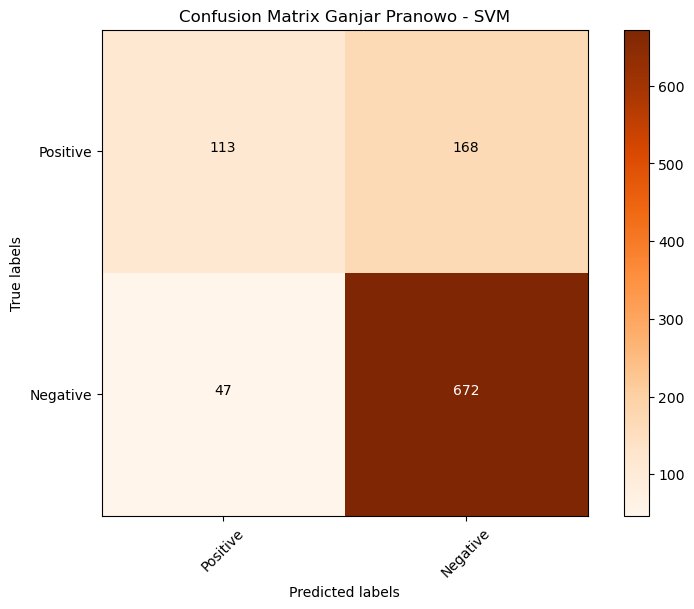

In [75]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix Ganjar Pranowo - SVM', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
target_names = ('Positive', 'Negative')
plot_confusion_matrix(result_matrics, target_names)

In [28]:
Final.to_excel('HasilAnies03.xlsx')

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
filename = 'ModelAnalisisAnies.csv'
pickle.dump(model, open(filename, 'wb'))

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.742


In [32]:
X_test.shape

(1500, 8803)

In [33]:
y_train.shape

(3500,)

In [34]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv = 10)
scores

array([ 0.01297236,  0.00136027, -0.11476063, -0.02186391, -0.11476063,
       -0.11476063, -0.01025182, -0.04665072, -0.04665072, -0.02339181])

In [35]:
print(np.mean(scores))

-0.04787582096205255


In [36]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, X_test, y_test)
pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
scores_test = cross_val_score(model, X_test, y_test, cv =10)
scores_test

array([0.68666667, 0.71333333, 0.71333333, 0.74      , 0.71333333,
       0.67333333, 0.68      , 0.68      , 0.78      , 0.72      ])

In [38]:
print(np.mean(scores_test))

0.7100000000000001
